In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [2]:
import os
DATA_PATH = os.path.abspath(os.path.join(os.getcwd(), '..\..\..\datasets\MNIST'))

In [3]:
def load_images(filename):
    with open(filename, 'rb') as f:
        images = np.frombuffer(f.read(), np.uint8, offset=16)
        images = images / 255.0
        images = images.reshape(-1, 28*28)
    return images

def load_labels(filename):
    with open(filename, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)
    return labels

In [4]:
train_images = load_images(os.path.join(DATA_PATH, 'train-images.idx3-ubyte'))
train_labels = load_labels(os.path.join(DATA_PATH, 'train-labels.idx1-ubyte'))
test_images = load_images(os.path.join(DATA_PATH, 't10k-images.idx3-ubyte'))
test_labels = load_labels(os.path.join(DATA_PATH, 't10k-labels.idx1-ubyte'))

In [5]:
def plot_images(images, labels):
    figure, axs = plt.subplots(2, 10, figsize=(20,5))
    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
    for i, ax in enumerate(figure.axes):
        ax.imshow(images[i].reshape(28, 28), cmap="grey")
        ax.set_title(labels[i])

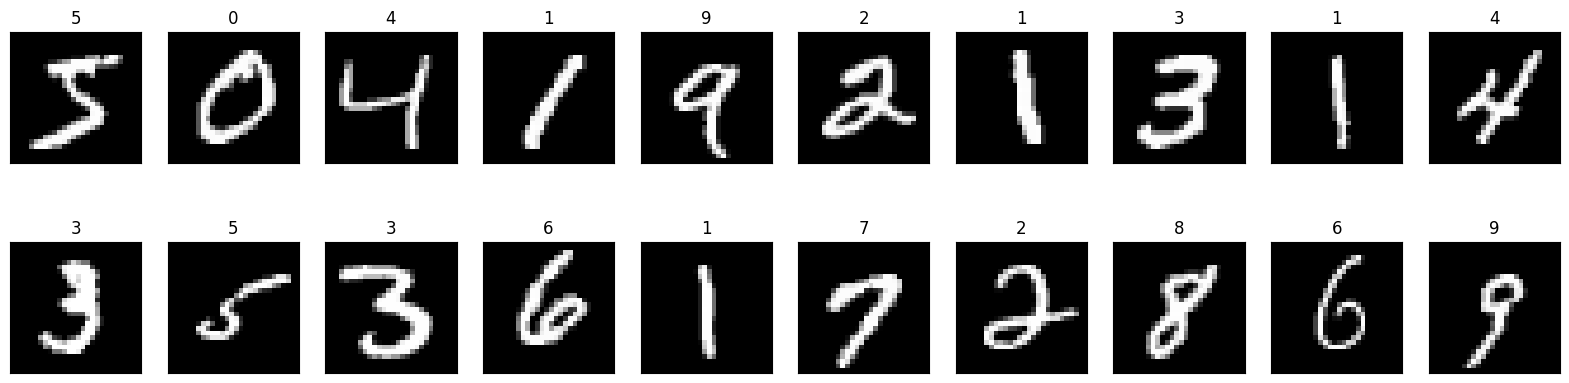

In [6]:
# Training data
plot_images(train_images, train_labels)

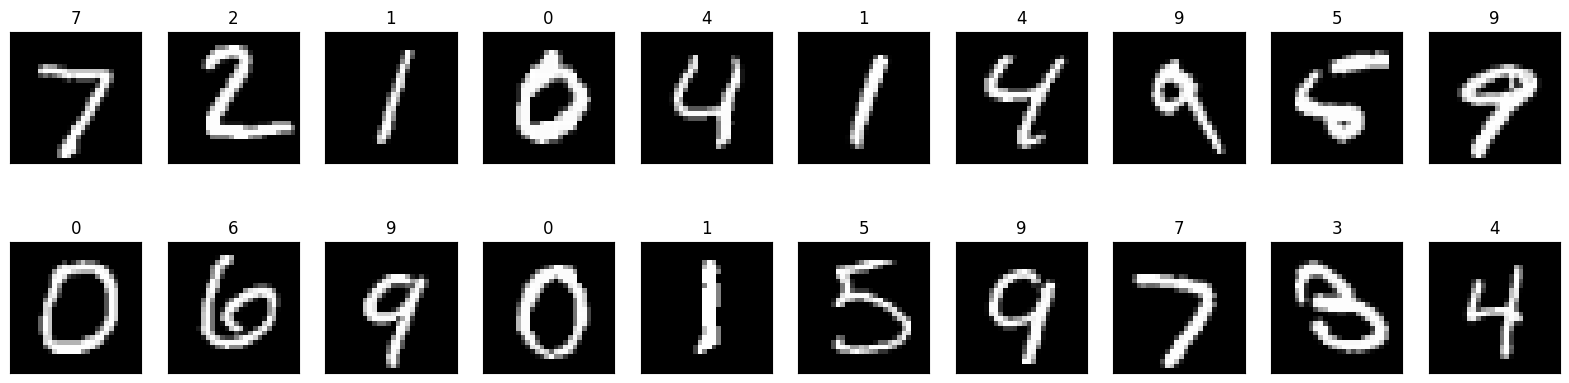

In [7]:
# Test data
plot_images(test_images, test_labels)

In [8]:
class neural_network_class:
    def __init__(self, input_size, hidden_layer_size, output_size, learning_rate):
        self.W1 = np.random.randn(input_size, hidden_layer_size) * np.sqrt(2.0/input_size)
        self.W2 = np.random.randn(hidden_layer_size, output_size) * np.sqrt(2.0/hidden_layer_size)
        self.b1 = np.zeros((1, hidden_layer_size))
        self.b2 = np.zeros((1, output_size))
        self.learning_rate = learning_rate

    def forward(self, X):
        self.HL = np.dot(X, self.W1) + self.b1
        self.HLA = self.relu(self.HL)  
        
        self.OL = np.dot(self.HLA, self.W2) + self.b2
        self.OLA = self.softmax(self.OL)
        return self.OLA

    def backward(self, X, y, y_prediction):
        m = X.shape[0]
        
        d2 = (y_prediction - y) / m
        dW2 = np.dot(self.HLA.T, d2) 
        db2 = np.sum(d2, axis=0, keepdims=True)

        d1 = np.dot(d2, self.W2.T) * self.drelu(self.HL)
        dW1 = np.dot(X.T, d1)
        db1 = np.sum(d1, axis=0, keepdims=True)
        
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    def relu(self, x):
        return np.maximum(0, x)

    def drelu(self, x):
        return np.where(x > 0, 1, 0)

    def softmax(self, x):
        exp = np.exp(x - np.max(x, axis = 1, keepdims = True))
        return exp / np.sum(exp, axis = 1, keepdims = True)

    def accuracy(self, X, y):
        return np.mean(np.argmax(X, axis = 1) == np.argmax(y, axis = 1))
    
    def cross_entropy_loss(self, u, y):
        return np.mean(- 1 * y * np.log(u))

    def train(self, train_images, train_labels, test_images, test_labels, epochs, batch_size):
        total_time = 0
        # NN learning process per epoch
        for epoch in range(epochs):
            start = time.time()
            # Randomize selected data
            indices = np.random.permutation(train_images.shape[0])
            images_random_pick = train_images[indices]
            labels_random_pick = train_labels[indices]

            for i in range(0, train_images.shape[0], batch_size):
                # Take small batches
                images_batch = images_random_pick[i:i + batch_size]
                labels_batch = labels_random_pick[i:i + batch_size]

                output = self.forward(images_batch)
                self.backward(images_batch, labels_batch, output)

            predictions = self.forward(train_images)
            loss = self.cross_entropy_loss(predictions, train_labels)
            acc = self.accuracy(predictions, train_labels)
            runtime = time.time() - start
            total_time += runtime
            print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss:.5f}, Accuracy: {acc:.5f}, Elapsed time: {total_time:.3f} seconds')

        # Test sample result with prepared nn
        test_output = self.forward(test_images)
        test_loss = self.cross_entropy_loss(test_output, test_labels)
        test_acc = self.accuracy(test_output, test_labels)
        print(f'Test sample result: cross entropy loss: {test_loss:.5f}, accuracy: {test_acc:.5f}')

In [9]:
input_size = 28 * 28  
hidden_layer_size = 300  
output_size = 10  
learning_rate = 0.1

nnc = neural_network_class(input_size, hidden_layer_size, output_size, learning_rate)

epochs = 20
batch_size = 32

train_labels2 = np.identity(output_size)[train_labels]
test_labels2 = np.identity(output_size)[test_labels]

nnc.train(train_images, train_labels2, test_images, test_labels2, epochs, batch_size)

Epoch 1/20, Loss: 0.01567, Accuracy: 0.95612, Elapsed time: 4.240 seconds
Epoch 2/20, Loss: 0.01007, Accuracy: 0.97115, Elapsed time: 8.620 seconds
Epoch 3/20, Loss: 0.00797, Accuracy: 0.97717, Elapsed time: 12.969 seconds
Epoch 4/20, Loss: 0.00558, Accuracy: 0.98438, Elapsed time: 17.301 seconds
Epoch 5/20, Loss: 0.00427, Accuracy: 0.98883, Elapsed time: 21.612 seconds
Epoch 6/20, Loss: 0.00382, Accuracy: 0.98948, Elapsed time: 25.968 seconds
Epoch 7/20, Loss: 0.00309, Accuracy: 0.99277, Elapsed time: 30.308 seconds
Epoch 8/20, Loss: 0.00252, Accuracy: 0.99415, Elapsed time: 34.609 seconds
Epoch 9/20, Loss: 0.00214, Accuracy: 0.99577, Elapsed time: 39.114 seconds
Epoch 10/20, Loss: 0.00182, Accuracy: 0.99678, Elapsed time: 43.837 seconds
Epoch 11/20, Loss: 0.00170, Accuracy: 0.99688, Elapsed time: 48.583 seconds
Epoch 12/20, Loss: 0.00143, Accuracy: 0.99805, Elapsed time: 53.448 seconds
Epoch 13/20, Loss: 0.00114, Accuracy: 0.99868, Elapsed time: 58.472 seconds
Epoch 14/20, Loss: 0.00